In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In diesem Notebook analysieren wir ein paar Angebote zur Förderung der sozialen Teilhabe pro Stadtgebiet oder Stadtbezirk. Dazu gehören unter anderem das Bücherbusangebot, GiveBoxen und Kitastandorte. Ein Überblick über weitere Angebote und Standorte bekommt man hier https://www.muenster-fast-umsonst.de/ 
<br>

Zunächst mappen wir auf den Gebiets-Leveln Stadtgebiet und statistische Stadtbezirke, da unsere zu analysierenden Quellen Informationen auf Basis dieser unterschiedlichen Gebiets-Leveln beinhalten.

In [93]:
#dictionary mit Einträgen mapping.items()
mapping= {'Hiltrup':['Amelsbüren','Berg Fidel','Hiltrup-Ost','Hiltrup-Mitte'], 
          'Nord':['Coerde', 'Kinderhaus-West', 'Kinderhaus-Ost','Sprakel'], 
          'Ost':['Mauritz-Ost','Gelmer/Dyckburg','Handorf'] , 
          'Suedost':['Gremmendorf','Angelmodde','Wolbeck'], 
          'West':['Gievenbeck-Süd','Gievenbeck-Nord','Sentrup','Roxel', 'Albachten','Mecklenbeck','Nienberge'], 
          'Mitte': ['Piusallee','Altstadt','Kreuz','Schloss','Schützenhof/Hafen','Pluggendorf/Bahnhof','Geist/Pluggendorf','Aaseestadt','Mauritz-Mitte','Düesberg','Herz-Jesu','Rumphorst','Uppenberg','Hansaplatz'] }


tuples = [ (k, v) for k, values in mapping.items() for v in values ]
df_mapping= pd.DataFrame(tuples, columns=['Stadtgebiet','Stadtbezirk'])
df_mapping.head()

,Stadtgebiet,Stadtbezirk
0,Hiltrup,Amelsbüren
1,Hiltrup,Berg Fidel
2,Hiltrup,Hiltrup-Ost
3,Hiltrup,Hiltrup-Mitte
4,Nord,Coerde


In [94]:
print("Bezirke mit niedrigerem Sozialen Index: Berg Fidel, Coerde , Bahnhof, Kinderhaus-West, Münster-Nord, Angelmodde, Hafen.")
filt=df_mapping['Stadtbezirk'].str.contains(r'Berg Fidel|Coerde|Bahnhof|Kinderhaus-West|Münster-Nord|Angelmodde|Hafen')#regex
low_score=[x for x in df_mapping[filt]['Stadtbezirk']]
df_mapping[filt]
low_score

Bezirke mit niedrigerem Sozialen Index: Berg Fidel, Coerde , Bahnhof, Kinderhaus-West, Münster-Nord, Angelmodde, Hafen.


['Berg Fidel',
 'Coerde',
 'Kinderhaus-West',
 'Angelmodde',
 'Schützenhof/Hafen',
 'Pluggendorf/Bahnhof']

<br>
<br>

**Zuerst schauen wir uns die Standorte der Bücherbus-Haltestellen an.**

In [95]:
df=pd.read_csv("Dateien/buecherbus_haltestellen.csv")
df.head()

,NAME,RECHTSWERT,HOCHWERT,LINK1_TXT,LINK1,LINK2_TXT,LINK2
0,"Hiltrup, Böttcherstraße",405317,5751424,Informationen zum Bücherbus,https://www.stadt-muenster.de/de/buecherei/bue...,Fahrplan,https://www.stadt-muenster.de/buecherei/bueche...
1,Laerer Landweg,408615,5756552,Informationen zum Bücherbus,https://www.stadt-muenster.de/de/buecherei/bue...,Fahrplan,https://www.stadt-muenster.de/buecherei/bueche...
2,"Handorf, Nieland, Dorbaum",411561,5761907,Informationen zum Bücherbus,https://www.stadt-muenster.de/de/buecherei/bue...,Fahrplan,https://www.stadt-muenster.de/buecherei/bueche...
3,"Roxel, Schulte-Hermann-Straße",399210,5756857,Informationen zum Bücherbus,https://www.stadt-muenster.de/de/buecherei/bue...,Fahrplan,https://www.stadt-muenster.de/buecherei/bueche...
4,Gottfried-v.-Cappenberg-Schule,404494,5754463,Informationen zum Bücherbus,https://www.stadt-muenster.de/de/buecherei/bue...,Fahrplan,https://www.stadt-muenster.de/buecherei/bueche...


In [96]:
"""
#Überprüfen wo man Werte in der Name-Spalte ersetzen muss

for j in df['NAME'].str.split(','):
    if len(j) != 2:
        print(j, len(j))
        
len(df['NAME'].str.split(','))==len(df.index)
"""
#Werte in der Name-Spalte ersetzen
df.iloc[1,0]='Mauritz-Ost, Laerer Landweg'
df.iloc[2,0]='Handorf, Nieland'
df.iloc[4,0]='Geist, Gottfried-v.-Cappenberg-Schule'
df.iloc[8,0]='Berg Fidel, Primus-Schule'
df.iloc[16,0]='Rumphorst, Erich-Kästner-Schule'


df[['Stadtgebiet','Standort']]=df['NAME'].str.split(',',expand=True)

print("Anzahl Bücherbushaltestellen pro Stadtgebiet: ", df['Stadtgebiet'].value_counts() , sep="\n")

Anzahl Bücherbushaltestellen pro Stadtgebiet: 
Handorf        2
Gremmendorf    2
Angelmodde     2
Berg Fidel     2
Mecklenbeck    2
Albachten      2
Hiltrup        1
Mauritz-Ost    1
Roxel          1
Geist          1
Sprakel        1
Wolbeck        1
Amelsbüren     1
Nienberge      1
Rumphorst      1
Gelmer         1
Name: Stadtgebiet, dtype: int64


**Fazit:**
Zwar hält der Bücherbus in Angelmodde und Berg Fidel jeweils 2 Mal, aber in den Stadtteilen Coerde, Hiltrup und Kinderhaus nur 0-1 Mal. Allerdings hält der Bücherbus auch nicht unbedingt in den besser gestellten Stadtbezirken, sondern eher nur in den vom Stadtzentrum entfernteren Bereichen.

<br>
<br>
<br>
<br>

**Untersucht werden Standorte von folgenden Angeboten:**


In [97]:
df1=pd.read_excel("Dateien/giveboxen-muenster-202403.xlsx")
df1#.head()
print(df1['Kategorie'].unique() ,' ',' ', "Die Ex-Givebox'en sind laut Spalte Öffnungszeiten dauerhaft geschlossen. Deren Standorte schauen wir uns trotzdem an.", sep="\n")

['Givebox' 'Garagenflohmarkt' 'Öffentliches Bücherregal'
 'Givebox "AWM Wechselstube"' 'Ex-Givebox']
 
 
Die Ex-Givebox'en sind laut Spalte Öffnungszeiten dauerhaft geschlossen. Deren Standorte schauen wir uns trotzdem an.


In [98]:
df1['Öffnungszeiten'].unique()#Welche Werte es genau gibt
filt=( df1['Öffnungszeiten'].str.contains(r'\?|geschlossen') )#regulärer Ausdruck '?' oder 'geschlossen'


df1_closed_unclear=df1.loc[filt][['Kategorie','Bezirk']]
df1_open=df1.loc[~filt][['Kategorie','Bezirk']]

print('geschlossene Angebote oder mit unklaren Öffnungszeiten:', df1_closed_unclear['Bezirk'].value_counts() , sep="\n")
     
print('Angebote mit bekannten Öffnungszeiten:',df1_open['Bezirk'].value_counts() , sep="\n")


geschlossene Angebote oder mit unklaren Öffnungszeiten:
Hiltrup          3
Mitte            2
Mauritz-Mitte    2
Berg Fidel       1
Herz-Jesu        1
Kreuz            1
Name: Bezirk, dtype: int64
Angebote mit bekannten Öffnungszeiten:
Mitte          4
Gievenbeck     2
Mecklenbeck    2
Coerde         2
Albachten      1
Mauritz        1
Gremmendorf    1
Nienberge      1
Kinderhaus     1
Mauritz-Ost    1
Handorf        1
Hiltrup        1
Roxel          1
Wolbeck        1
Name: Bezirk, dtype: int64


**Fazit:**
Für die Angebote Givebox, Garagenflohmarkt, Öffentliches Bücherregal gibt es eine ausgeglichene Standortverteilung in besser gestellten Gebieten (höherem sozialen Score) und sozial schwacheren Gebieten. Wir sehen lediglich dass in Hiltrup und Berg-Fidel, die zum Teil zu den sozial schwächeren Gebieten gehören, die Angebots-Verfügbarkeits-Information nach der Quelldatei unklar sind oder dass die Angebote geschlossen sind. Hier könnte man nachforschen inwieweit die Angebote noch verfügbar sind und diese ggf wiedereröffnen. 

<br>
<br>
<br>

**Als nächstes schauen wir uns die Standorte der Kitas in Münster an.**

In [99]:
df2=pd.read_csv("Dateien/kitas_ms.csv")
df2#.head()
#df2['ADRESSE'].unique()

,LFDNR,KITA_ID,E_NAME,ADRESSE,RECHTSWERT,HOCHWERT,HOMEPAGE,BEZIRK
0,6,8.0,Dickmadame und Zappelmann,Frauenstraße 8,405253,5757886,http://www.dickmadame-zappelmann.de,Überwasser
1,78,127.0,Waldorfkindergarten,Rudolf-Steiner-Weg 9,402585,5758664,http://www.waldorfkindergarten-muenster.de,Gievenbeck
2,21,67.0,Nord,Wermelingstraße 26,405864,5758636,http://www.muenster.org/kindergruppe-nord,Kreuz
3,56,77.0,Fliednerhaus,Fehrbellinweg 6,405326,5755597,https://www.ekfh.de/,Geist
4,40,21.0,Evangelische Sternkindertagesstätte,Sternstraße 10,406657,5757222,http://www.sternkita.de,Hansaplatz
...,...,...,...,...,...,...,...,...
218,863,407.0,Kita Waldbach,Middelerstraße 19,412569,5753479,-,Wolbeck
219,472,402.0,Mecklenbeck,Meyerbeerstraße 12,402525,5753908,-,Mecklenbeck
220,988,428.0,St. Hilda,Kentweg 1,408116,5753931,-,Gremmendorf
221,444,155.0,Klaras Kinderhaus (Dep.),Andreas-Hofer-Straße 70,407519,5757378,http://www.cvjmmuenster.de,Herz-Jesu


In [100]:
df2['BEZIRK'].unique() #alle statistischen Bezirke

array(['Überwasser', 'Gievenbeck', 'Kreuz', 'Geist', 'Hansaplatz',
       'Rumphorst', 'Schlachthof', 'Buddenturm', 'Josef', 'Schützenhof',
       'Uppenberg', 'Mauritz-Mitte', 'Sentrup', 'Nienberge', 'Coerde',
       'Roxel', 'Mecklenbeck', 'Kinderhaus-West', 'Kinderhaus', 'Sprakel',
       'Handorf', 'Gelmer/Dyckburg', 'Wolbeck', 'Gremmendorf',
       'Mauritz-Ost', 'Hiltrup', 'Berg Fidel', nan, 'Berg-Fidel',
       'Angelmodde', 'Neutor', 'Schloss', 'Martini', 'Amelsbüren',
       'Mitte', 'Herz-Jesu', 'Kinderhaus-Ost', 'Düesberg', 'Aaseestadt',
       'Albachten', 'Hansaviertel', 'Pluggendorf', 'Handforf'],
      dtype=object)

In [101]:
#Werte in der Spalte 'BEZIRK' vereinheitlichen
filt=(df2['BEZIRK']=='Berg-Fidel' )
df2.loc[filt,'BEZIRK']='Berg Fidel'

filt_na=df2['BEZIRK'].isnull()==True #hier ist 'Berg-Fidel' in die Homepagespalte gerutscht
df2.loc[filt_na,'BEZIRK']='Berg Fidel'

df2['BEZIRK'].unique()


array(['Überwasser', 'Gievenbeck', 'Kreuz', 'Geist', 'Hansaplatz',
       'Rumphorst', 'Schlachthof', 'Buddenturm', 'Josef', 'Schützenhof',
       'Uppenberg', 'Mauritz-Mitte', 'Sentrup', 'Nienberge', 'Coerde',
       'Roxel', 'Mecklenbeck', 'Kinderhaus-West', 'Kinderhaus', 'Sprakel',
       'Handorf', 'Gelmer/Dyckburg', 'Wolbeck', 'Gremmendorf',
       'Mauritz-Ost', 'Hiltrup', 'Berg Fidel', 'Angelmodde', 'Neutor',
       'Schloss', 'Martini', 'Amelsbüren', 'Mitte', 'Herz-Jesu',
       'Kinderhaus-Ost', 'Düesberg', 'Aaseestadt', 'Albachten',
       'Hansaviertel', 'Pluggendorf', 'Handforf'], dtype=object)

In [102]:
print(df2['BEZIRK'].value_counts())

print("Die Stadtteile mit niedrigerem sozialen Score sind",low_score ," wobei Berg Fidel zu Hiltrup gehört. Wir sehen dass es in der Umgebung von Berg Fidel, in Coerde und in Angelmodde und Schützenhof einige Kitas gibt.")


Hiltrup            16
Gievenbeck         13
Wolbeck            10
Josef               9
Coerde              8
Mecklenbeck         8
Schlachthof         7
Angelmodde          7
Rumphorst           7
Uppenberg           7
Geist               7
Roxel               7
Berg Fidel          6
Neutor              6
Gremmendorf         6
Amelsbüren          6
Handorf             6
Sprakel             6
Kreuz               6
Sentrup             6
Nienberge           5
Mauritz-Ost         5
Mauritz-Mitte       5
Schützenhof         5
Kinderhaus-Ost      5
Herz-Jesu           5
Mitte               5
Kinderhaus          4
Kinderhaus-West     4
Gelmer/Dyckburg     4
Aaseestadt          4
Hansaplatz          3
Albachten           3
Martini             2
Schloss             2
Düesberg            2
Pluggendorf         2
Hansaviertel        1
Überwasser          1
Buddenturm          1
Handforf            1
Name: BEZIRK, dtype: int64
Die Stadtteile mit niedrigerem sozialen Score sind ['Berg Fidel', 'Coer

**Fazit:**
Nimmt man Kinderhaus-West und Kinderhaus-Ost zusammen, sind Kitaplätze sind gleichmäßig auf die Stadtbezirke verteilt.
<br>Für weitere Angebote und Standorte der Angebote gibt es hier https://www.muenster-fast-umsonst.de/ eine Übersicht.
<br>
<br>

Als letztes visulaisieren wir die obigen Ergebnisse und sehen noch mal die Standorte der Angebote im Vergleich.

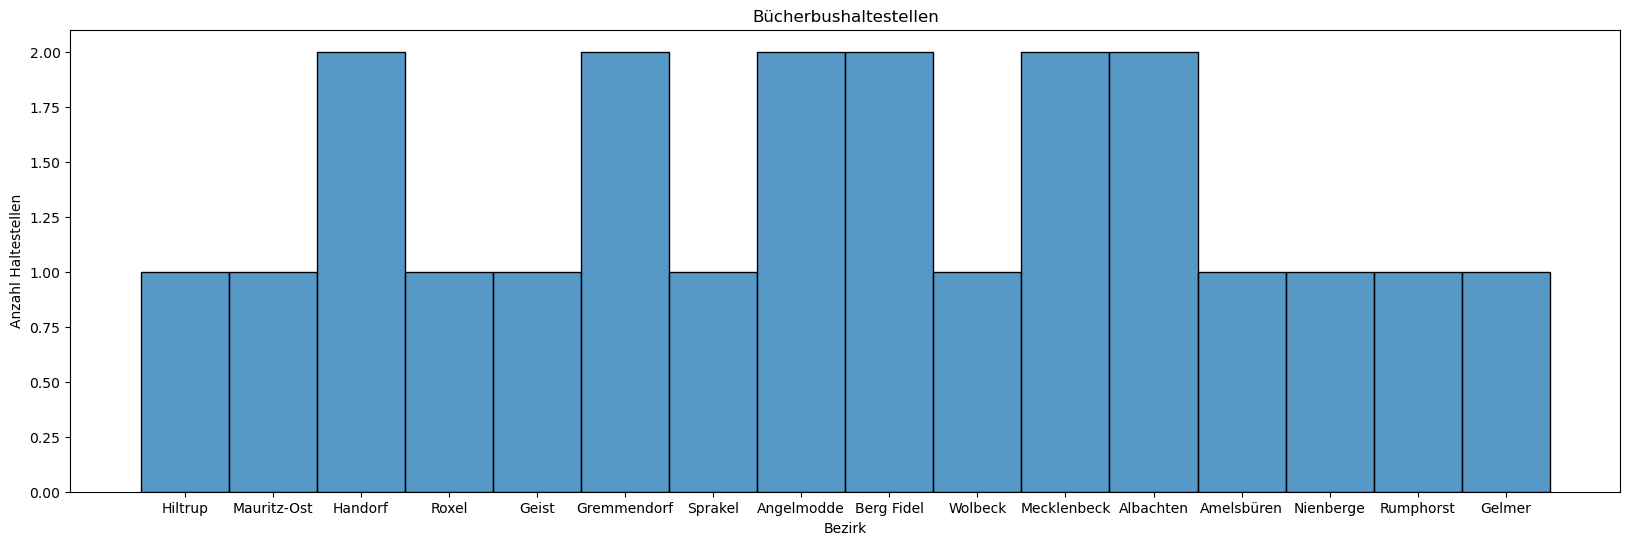

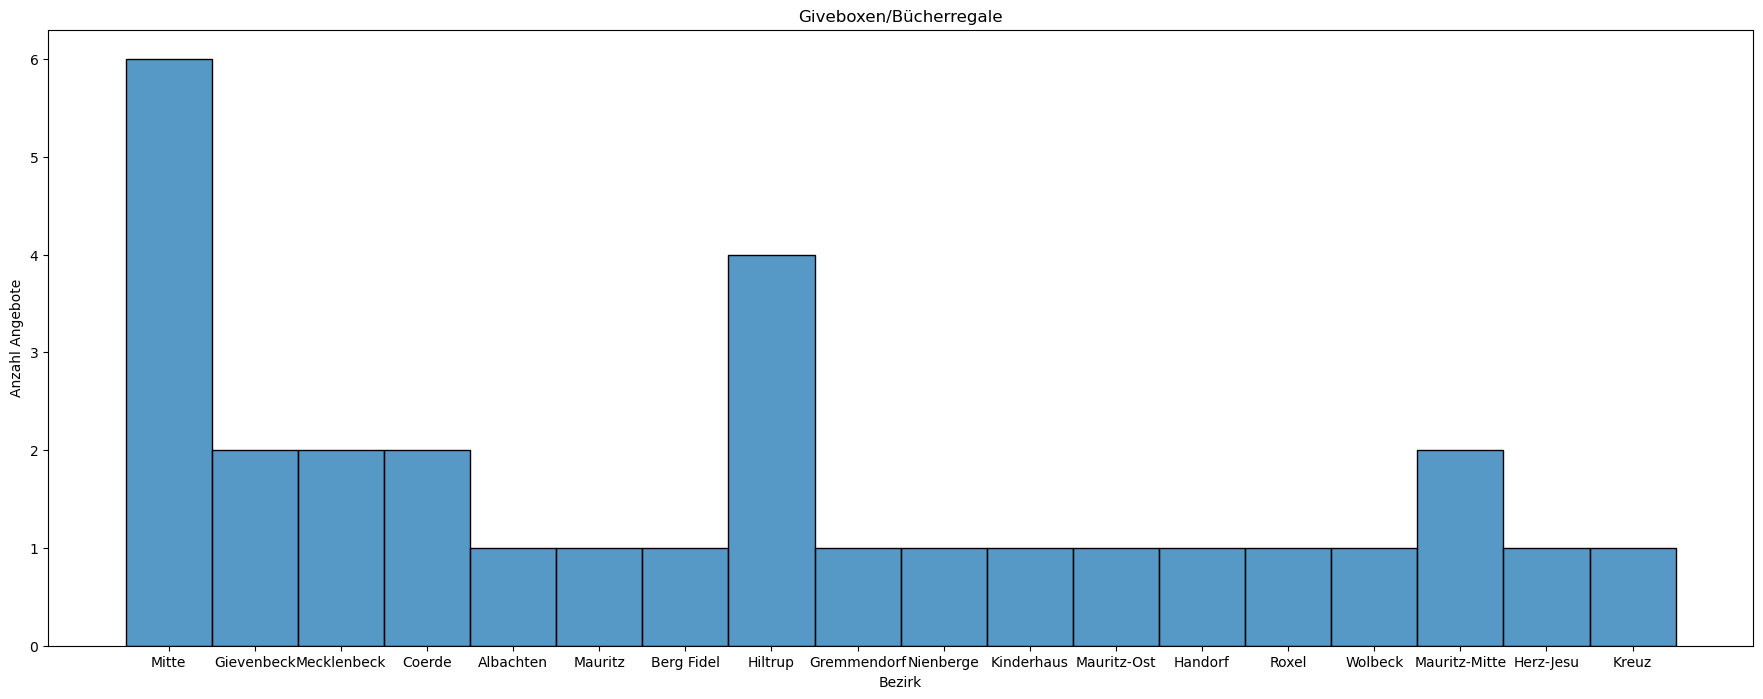

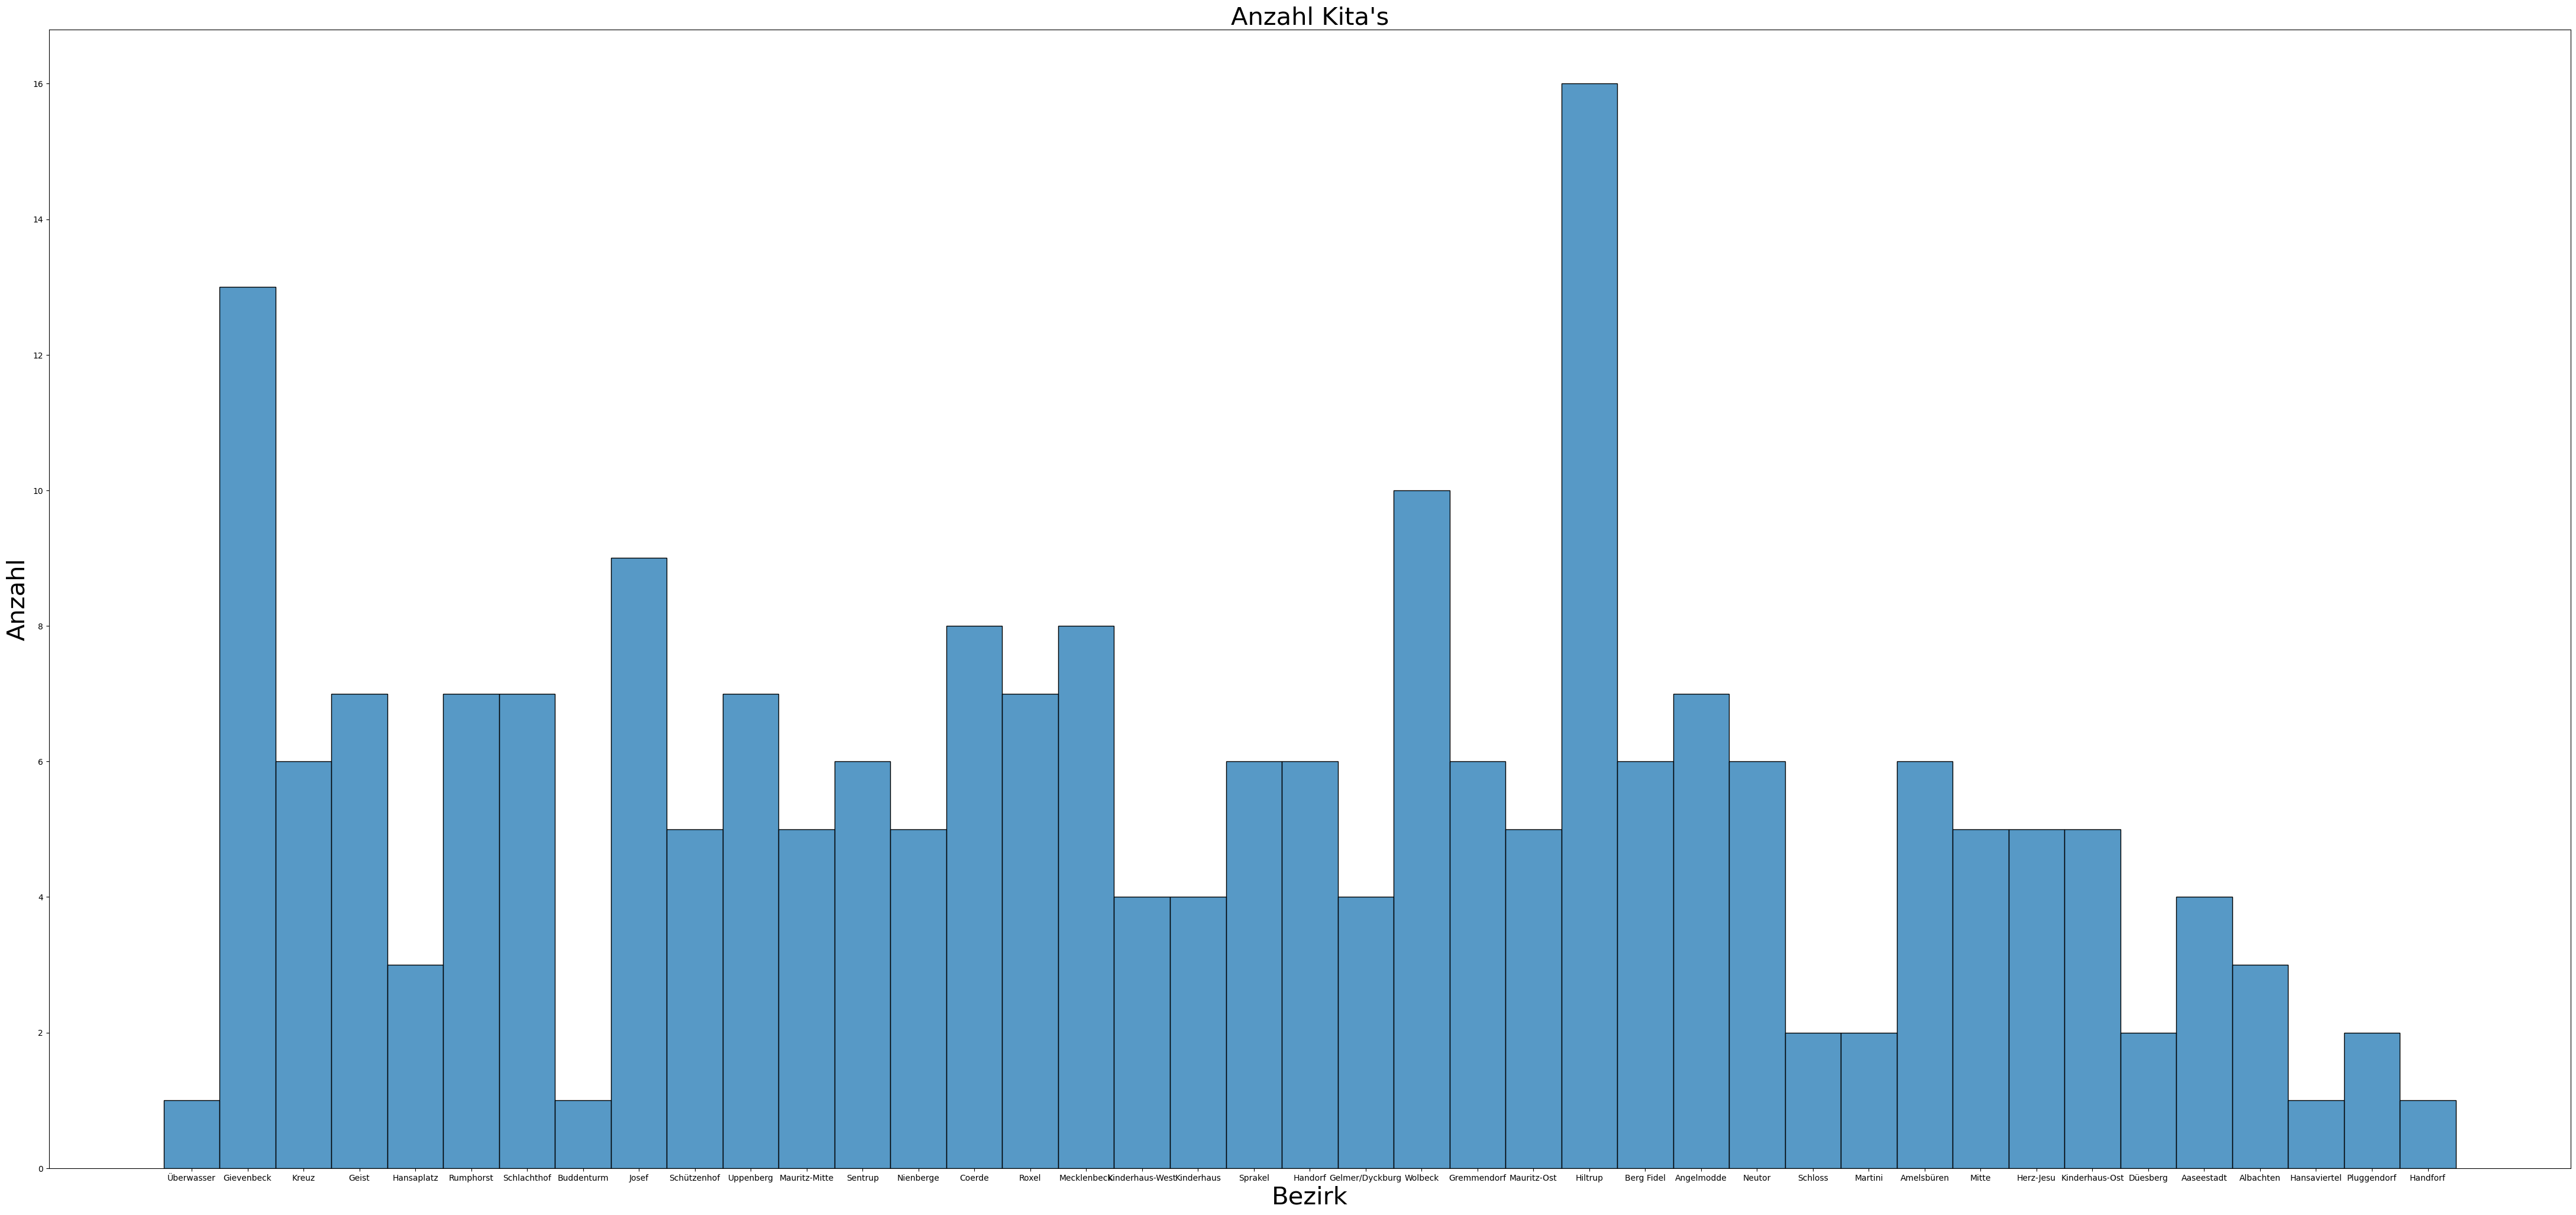

In [103]:
len(df['Stadtgebiet'].unique()) #16, für die Anzahl der bins, Bücherbus
len(df1['Bezirk'].unique()) #18, Giveboxen usw
len(df2['BEZIRK'].unique()) #41, Kita

plt.figure(figsize=(20,6))
sns.histplot(df['Stadtgebiet'], bins=16).set(title="Bücherbushaltestellen" ,xlabel="Bezirk", ylabel="Anzahl Haltestellen")

plt.figure(figsize=(22,8))
sns.histplot(df1['Bezirk'], bins=18).set(title="Giveboxen/Bücherregale" ,xlabel="Bezirk", ylabel="Anzahl Angebote")

plt.figure(figsize=(55,25))
plot=sns.histplot(df2['BEZIRK'], bins=41)
plot.set(title="Anzahl Kita's" ,xlabel="Bezirk", ylabel="Anzahl")
plot.set_title("Anzahl Kita's",fontsize=30)
plot.set_xlabel("Bezirk",fontsize=30)
plot.set_ylabel("Anzahl",fontsize=30)

plt.show()


